Classification is the task of assigning an observation to a category based on specific criteria.

In machine learning, classification is part of supervised learning, which means that the data used to train the model have labels that identify each category.

A critical step in the life cycle of a machine learning model is the evaluation of its performance.

Two techniques used to evaluate a classification model are the confusion matrix and the classification report.

we will learn to interpret the confusion matrix and the classification report while using them to evaluate the performance of a Different models on two common types of classification problems:

1. Binary classification

2. Multiclass classification

# Binary classification

### Breast cancer classification

In our binary classification problem, we will use the Wisconsin breast cancer dataset from sci-kit learn (sklearn). The goal is to train a model to predict whether biopsies of breast tissue are benign or malignant based on characteristics of the nuclei of the cells.

In binary classification, we refer to the class we want to predict (malignant) as Positive and the second class (benign) as Negative.

I have labeled the benign samples as 0 and the malignant samples as 1.

Let's see the dataset in excel workbook in csv format and the import the data here...

In [1]:
import pandas as pd
cancer = pd.read_csv('Datasets\cancer.csv') #For breast cancer prediction data

In [ ]:
#iris = pd.read_csv('Datasets\iris.csv') #For iris species prediction (convert the o/p column to target)

In [ ]:
#claimant = pd.read_csv('Datasets\claimant.csv') #For claimant hiring attorney prediction (convert the o/p column to target)

In [2]:
cancer.shape

(569, 31)

In [3]:
cancer.head(7)

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


### Let's Check the proportion of benign (0) and malignant (1) observations in the dependent variable target.

In [4]:
print(round(cancer['target'].value_counts()/len(cancer), 2))

0    0.63
1    0.37
Name: target, dtype: float64


### 63% of the observations are benign, and 37% are malignant.

In [5]:
# Libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries and modules for Machine Learning
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Libraries and modules for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

Let's Split the dataset into a train set (80%) and a test set(20%). Train the model on the train set and then use it to predict the class of the samples of the test set.

In [6]:
# Separate the independent variables from the dependent variable.
X = cancer.drop('target', axis = 1)
y = cancer['target']
# Divide the dataset into train (80%) and test (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Create a Support Vector Machine object.
svm = SVC()
# Fit the model to the train set.
svm.fit(X_train, y_train)
# Predict the classes on the test set.
y_predict = svm.predict(X_test)

### Now that we have the predictions, we need to evaluate the performance of our model.

### Evaluating the model
#### Confusion Matrix and Classification Report

The confusion matrix is an N x N table (where N is the number of classes) that contains the number of correct and incorrect predictions of the classification model.

To create the confusion matrix, we can use sklearn confusion_matrix(), which takes the real values (y_test) and the predicted values (y_predict).

We can use seaborn to print a heatmap of the confusion matrix.

In [13]:
confusion_matrix(y_predict,y_test)

array([[66,  7],
       [ 1, 40]], dtype=int64)

In [14]:
pd.crosstab(y_predict,y_test,)

target,0,1
row_0,,
0,66,7
1,1,40


<AxesSubplot:>

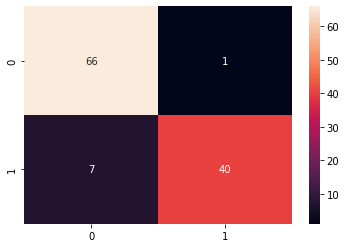

In [15]:
sns.heatmap(confusion_matrix(y_test,y_predict), annot = True)

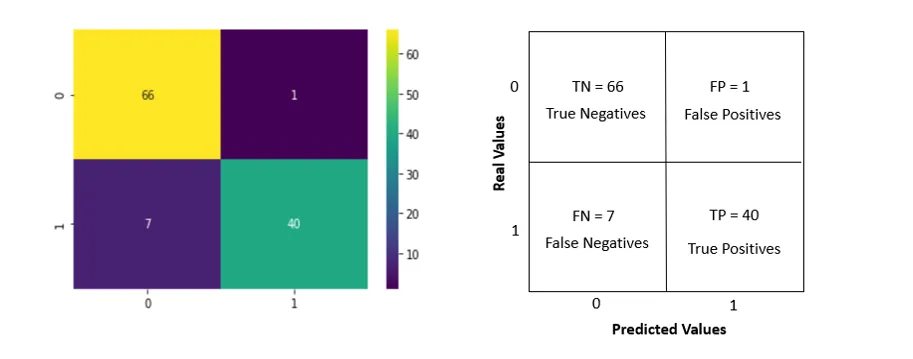

The rows of the matrix represent the real classes, while the columns represent the predicted classes.

The values returned by the confusion matrix are divided into the following categories:

1. True Positive (TP):
    
        The model predicted positive, and the real value is positive.

2. True Negative (TN):
    
        The model predicted negative, and the real value is negative.

3. False Positive (FP):
    
        The model predicted positive, but the real value is negative (Type I error).

4. False Negative (FN):
    
        The model predicted negative, but the real value is positive (Type II error).

### The diagonal from the top left to the bottom right contains the observations correctly predicted.

Let’s evaluate our model using the data of the confusion matrix.

1. Total predictions: 114
    
2. Correct predictions: 106 (66 benign (TN) and 40 malignant (TP))
    
3. Incorrect predictions: 8 (1 benign classified as malignant (FP) and 7 malignant classified as benign (FN))

#### Although detailed, the data above make it difficult to understand how good is the model at classifying cancer samples. We can use the data of the confusion matrix to compute metrics that quantify the performance of the model.

### Metrics for the evaluation of a classification model

#### Accuracy: The accuracy returns the proportion of correct predictions.

Accuracy = (TP + TN)/(TP + TN + FP + FN) = (66 + 40)/(66 + 40 + 1 + 7) = 0.93 = 93%

#### Precision: The precision returns the proportion of true positives among all the values predicted as positive.
    
Precision = TP/(TP + FP) = 40/(40 + 1) = 0.98 = 98%

#### Recall: The recall returns the proportion of positive values correctly predicted.

Recall = TP/(TP + FN) = 40/(40 + 7) = 0.85 = 85%

#### Specificity: The specificity returns the proportion of negative values correctly predicted.

Specificity: TN/ (TN + FP) = 66/(66 + 1) = 0.99 = 99%

#### F1-score: The f1-score is the harmonic mean of precision and recall. It is often used to compare classifiers.

F1-score = (2 x Precision x Recall) / (Precision + Recall) = 0.91 = 91%

In [16]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
print(f"Accuracy: {round(accuracy_score(y_test, y_predict), 2)}") 
print(f"Precision: {round(precision_score(y_test, y_predict), 2)}")
print(f"Recall: {round(recall_score(y_test, y_predict), 2)}")
print(f"F1_score: {round(f1_score(y_test, y_predict), 2)}")

Accuracy: 0.93
Precision: 0.98
Recall: 0.85
F1_score: 0.91


### sklearn classification_report() returns precision, recall and F1-score for each class.

In [17]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



#### Apart from the evaluation metrics, the classification report includes some additional information:

#### Support: 

                number of observations for each class.

#### Macro average: 

                the arithmetic average of a metric between the two classes.

#### Macro average(precision) 

                = (p0 + p1)/2 = (0.90 + 0.98)/2 = 0.94 = 94%

#### Weighted average: 
                 the weighted average is calculated by dividing sum(metric of interest x weight) by sum(weights).

    Here the weights are the number of observation for each class.

#### Weighted average (precision) 
                = (p0 x s0 + p1 x s1)/(s0 + s1) = (0.9 x 67) + (0.98 x 47)/(67 + 47) = 0.93

### What metric should we use to evaluate a classification model?

The metric we use to evaluate the model depends on two factors:

    1. Class balance
    2. Reason for the classification

The accuracy is extensively used to evaluate a classification model. It works well when the classes are balanced but it can be misleading when the classes are unbalanced.

Let’s consider our cancer diagnosis problem again, but this time let’s assume that only 5% of the observations are malignant. In this case, a model that returns benign for every sample will have an accuracy of 95%, but it will be of no use.

In this situation, it is crucial to detect all the malignant observations, even if it means classifying some benign samples as malignant.

In this case, the goal is to identify as many spams as possible while not losing emails of interest.

Here type II errors (false negative) are more acceptable than type I errors (false positive).

In other words, it is better having a few spams than losing an email of interest.

In this scenario, precision is the best metric to evaluate the model.

## Conclusions :
    
    we learned how to read the confusion matrix and compute accuracy, precision, recall and F1-score for both a binary and multiclass classification problem.

    We also learned that no metric is good enough to evaluate all classification problems, but that each metric is the best choice in specific circumstances.

    With this knowledge, we can interpret any classification report and use the information in it to confidently evaluate a model or compare different models.